# Build a simple trading strategy

In [64]:
import os
import pandas as pd
import matplotlib.pyplot as plt


 ### 1. Munging the stock data and add two columns - MA10 and MA50

In [65]:


# charging micrisoft dataset

ms = pd.read_csv('C:\data\microsoft.csv')




### Calcul des Moyennes Mobiles (MA10 et MA50)
This cell calculates the moving averages of Microsoft's closing price:

- **MA10**: 10-day moving average, which reacts quickly to recent price changes.
- **MA50**: 50-day moving average, smoothed to show the overall trend

In [66]:

ms['MA10'] = ms['Close'].rolling(10).mean()
ms['MA50'] = ms['Close'].rolling(50).mean()
ms.dropna(inplace=True)
ms.head()


,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
49,2015-03-13,40.700001,41.470001,40.610001,41.380001,38.443489,58007700,42.495,44.0034
50,2015-03-16,41.470001,41.639999,41.279999,41.560001,38.610714,35273500,42.263,43.9056
51,2015-03-17,41.369999,41.830002,41.150002,41.700001,38.740784,31587200,42.105,43.8044
52,2015-03-18,41.430000,42.830002,41.330002,42.500000,39.484009,43971800,42.049,43.7278
53,2015-03-19,42.259998,42.590000,42.220001,42.290001,39.288918,33879100,41.967,43.6606


### Add "Shares" column to make decisions base on the strategy

In [67]:
ms['shares'] = [ 1 if ms.loc[ei,'MA10'] > ms.loc[ei,'MA50'] else 0 for ei  in ms.index ]

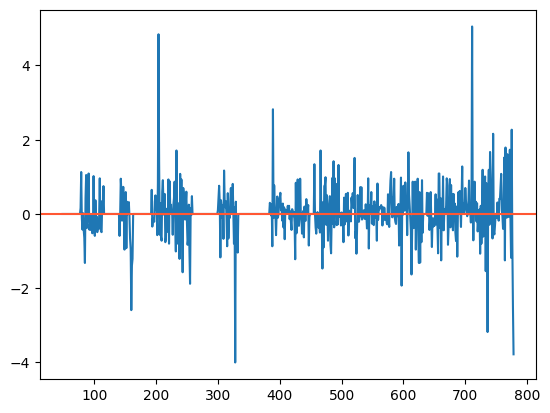

In [68]:
ms['Close1'] = ms['Close'].shift(-1)
ms['profit'] = [ ms.loc[ei,'Close1'] - ms.loc[ei,'Close'] if ms.loc[ei,'shares'] == 1 else 0 for ei in ms.index ]
ms['profit'].plot()
plt.axhline(y=0, color='#FF5733')
plt.show()

### Using .cumsum() to display our model's performance if we follow the strategy

In [69]:
ms['wealth'] = ms['profit'].cumsum()
ms.tail()


,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,shares,Close1,profit,wealth
775,2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,91.862,86.5244,1,95.010002,2.270004,30.540009
776,2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,92.349,86.7606,1,94.260002,-0.750000,29.790009
777,2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,92.765,86.9978,1,91.779999,-2.480003,27.310006
778,2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,92.943,87.1828,1,88.000000,-3.779999,23.530007
779,2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,92.582,87.2684,1,NaN,NaN,NaN


### Cumulative Wealth from the Trading Strategy

In this cell, we plot the cumulative wealth obtained from the moving average (MA10/MA50) trading strategy.  

- `ms['wealth']` represents the cumulative sum of daily profits.
- The plot shows how the total money grows over time if we follow this strategy.
- The title displays the total money earned at the end of the period:  
  `'Total money you win is 23,53$'`.

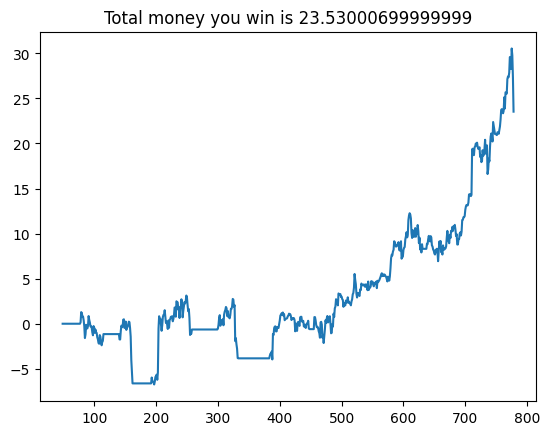

In [71]:

ms['wealth'].plot()
plt.title('Total money you win is {}'.format(ms.loc[ms.index[-2], 'wealth']))
plt.show()

### Munging the stock data for facebook and add two columns - MA10 

In [76]:
#importr data from facebook dataset
import pandas as pd
fb = pd.read_csv('C:/data/facebook.csv')


### Calcul des Moyennes Mobiles (MA10 et MA50)

In [78]:
fb['MA10'] = fb['Close'].rolling(10).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
fb.dropna(inplace=True)
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
98,2015-05-22,20.940001,21.020000,20.809999,20.860001,20.417433,5314800,21.010,21.9398
99,2015-05-26,20.760000,20.900000,20.570000,20.730000,20.290192,6493300,21.020,21.9004
100,2015-05-27,20.870001,21.940001,20.799999,21.840000,21.376638,10808300,21.121,21.8778
101,2015-05-28,21.840000,22.209999,21.799999,22.139999,21.670277,8191400,21.240,21.8556
102,2015-05-29,22.139999,22.280001,22.100000,22.129999,21.660488,8324900,21.324,21.8408


### Add "Shares" column to make decisions base on the strategy

In [80]:
fb['shares'] = [ 1 if fb.loc[ei,'MA10'] > fb.loc[ei,'MA50'] else 0 for ei  in fb.index ]

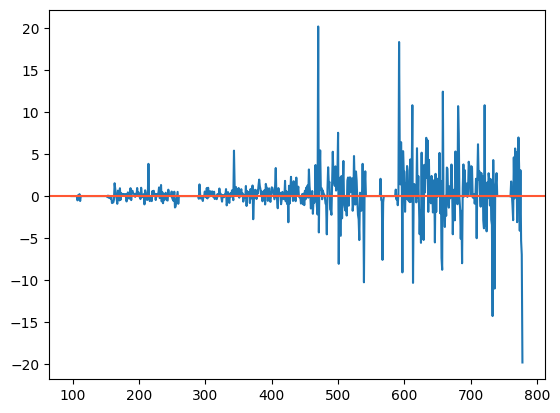

In [82]:
fb['Close1'] = fb['Close'].shift(-1)
fb['profit'] = [ fb.loc[ei,'Close1'] - fb.loc[ei,'Close'] if fb.loc[ei,'shares'] == 1 else 0 for ei in fb.index ]
fb['profit'].plot()
plt.axhline(y=0, color='#FF5733')
plt.show()

### Using .cumsum() to display our model's performance if we follow the strategy

In [84]:
fb['wealth'] = fb['profit'].cumsum()
fb.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,shares,Close1,profit,wealth
775,2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,235.692003,210.030001,1,245.800003,3.080002,182.060012
776,2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,237.800003,210.713801,1,240.500000,-5.300003,176.760009
777,2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,239.406003,211.296601,1,233.520004,-6.979996,169.780013
778,2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,239.747003,211.685401,1,213.699997,-19.820007,149.960006
779,2018-02-05,227.000000,233.229996,205.000000,213.699997,213.699997,28869000,237.748003,211.638401,1,NaN,NaN,NaN


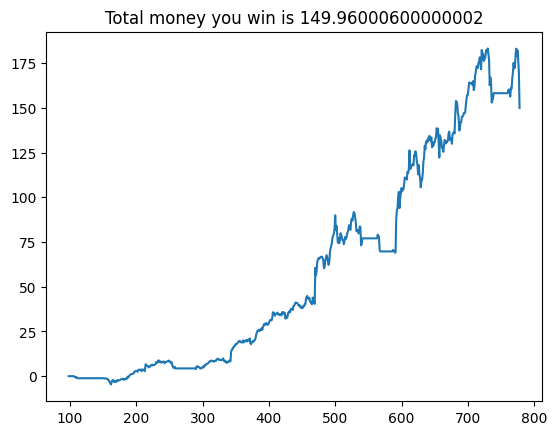

In [85]:
fb['wealth'].plot()
plt.title('Total money you win is {}'.format(fb.loc[fb.index[-2], 'wealth']))
plt.show()